<a href="https://colab.research.google.com/github/revontheus6/Tugas-DSA-Outlier/blob/main/Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk tampilan grafik yang lebih rapi
sns.set(style="whitegrid")

In [4]:
# 2. Buat data dengan outlier
np.random.seed(42)  # agar hasil selalu sama

# Buat 100 data normal (mean=50, std=5)
data_normal = np.random.normal(loc=50, scale=5, size=100)

# Tambahkan beberapa nilai outlier ekstrem
outliers = np.array([100, 110, 120])

# Gabungkan data normal dan outlier
data_total = np.concatenate((data_normal, outliers))

# Masukkan ke dalam DataFrame
df = pd.DataFrame(data_total, columns=['nilai'])

# Tampilkan 10 data pertama
df.head(10)


,nilai
0,52.483571
1,49.308678
2,53.238443
3,57.615149
4,48.829233
5,48.829315
6,57.896064
7,53.837174
8,47.652628
9,52.712800


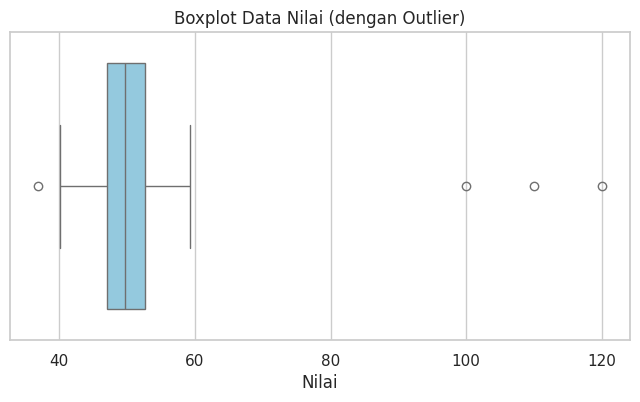

In [5]:
# 3. Tampilkan grafik boxplot untuk melihat outlier
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['nilai'], color='skyblue')
plt.title('Boxplot Data Nilai (dengan Outlier)')
plt.xlabel('Nilai')
plt.show()

In [6]:
# 4. Deteksi outlier dengan metode IQR
Q1 = df['nilai'].quantile(0.25)
Q3 = df['nilai'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
outlier_data = df[(df['nilai'] < lower_bound) | (df['nilai'] > upper_bound)]

print("Outlier yang terdeteksi:")
print(outlier_data)


Outlier yang terdeteksi:
          nilai
74    36.901274
100  100.000000
101  110.000000
102  120.000000


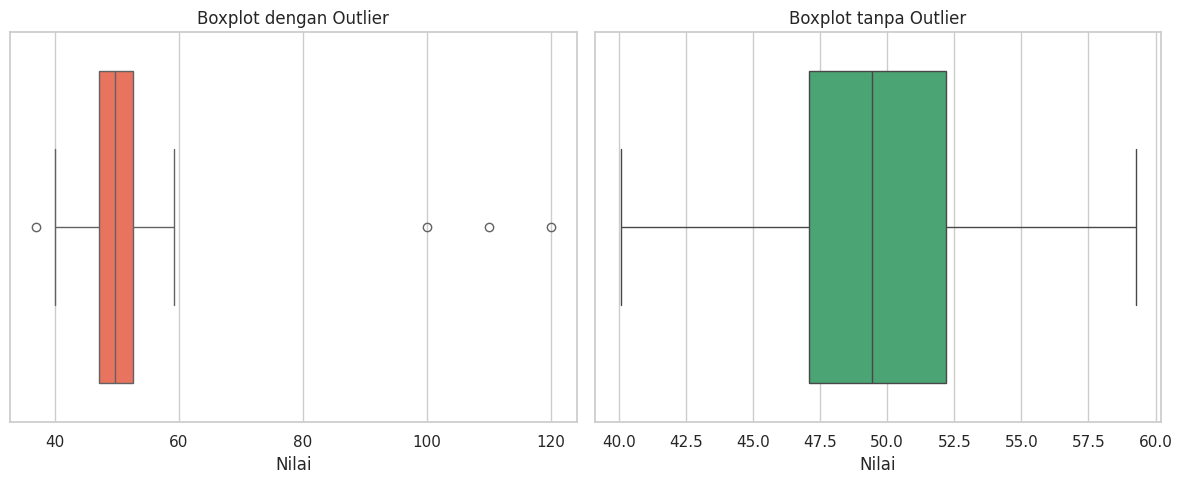

In [7]:
# 5. Perbandingan: grafik dengan outlier dan tanpa outlier
df_no_outlier = df[(df['nilai'] >= lower_bound) & (df['nilai'] <= upper_bound)]

plt.figure(figsize=(12, 5))

# Grafik dengan outlier
plt.subplot(1, 2, 1)
sns.boxplot(x=df['nilai'], color='tomato')
plt.title("Boxplot dengan Outlier")
plt.xlabel('Nilai')

# Grafik tanpa outlier
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outlier['nilai'], color='mediumseagreen')
plt.title("Boxplot tanpa Outlier")
plt.xlabel('Nilai')

plt.tight_layout()
plt.show()

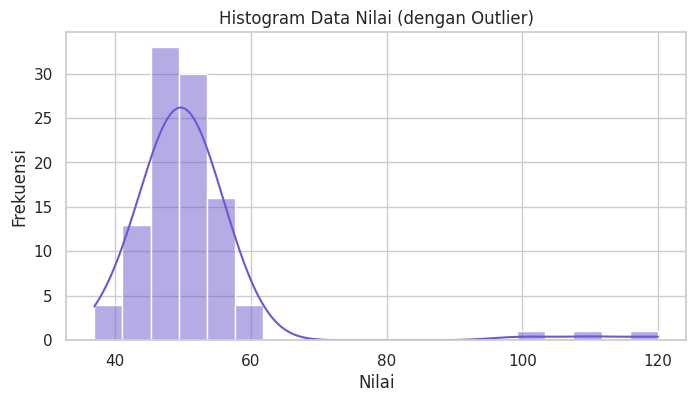

In [8]:
# 6. Tambahan: histogram data nilai
plt.figure(figsize=(8, 4))
sns.histplot(df['nilai'], bins=20, kde=True, color='slateblue')
plt.title('Histogram Data Nilai (dengan Outlier)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()